In [77]:
from base_dd import BDD_EVENTS
import numpy as np
import pandas as pd
from scipy.linalg import eigh
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def norm(x):
    return np.max(np.abs(x))

def gradient_logistic_regression(X, y, w):
    return (np.array((sigmoid(X @ w) - y)).reshape(-1, 1) * X).mean(axis=0)

def lr_opti(X):
    lr = (4 * X.shape[0]) / eigh(
        X.T @ X,
        eigvals_only=True,
        subset_by_index=[X.shape[1] - 1, X.shape[1] - 1]
    ).item()
    return lr


def gradient_descent(X, y, max_iter, tol, lr):
    w = np.zeros(X.shape[1])
    grad = gradient_logistic_regression(X, y, w)
    if norm(grad) < tol:
        return {'coef': w, 'convergé': True, 'n_iter': 0}
    converge = False
    for n_iter in range(1, max_iter + 1):
        w -= lr * grad
        grad = gradient_logistic_regression(X, y, w)
        if norm(grad) < tol:
            converge = True
            break
    return {'coef': w, 'convergé': converge, 'n_iter': n_iter, 'gradient': grad}

def prediction(x, w):
    return x@w > 0

In [91]:
#Nettoyage et Encodage

variable = ['Height', 'Weight']
variable_quali = []

df = BDD_EVENTS.loc[BDD_EVENTS['Sport'].isin(['Gymnastics']), variable + ['Medal']]
df.loc[df['Medal'].isna(), 'Medal'] = 0
df.loc[df['Medal']!=0, 'Medal'] = 1
df = df.dropna(axis=0, how='any')
X = df[variable]
Y = df['Medal']
Y = np.round(Y).astype(int)
X_E = pd.get_dummies(X, columns=variable_quali, drop_first=False, dtype=int)
X_log = np.hstack((X_E, np.ones((X_E.shape[0], 1))))

YG = Y[df['Medal']==1]
X_EG = X_E[df['Medal']==1]
X_logG = X_log[df['Medal']==1]
df.to_csv("couimme.csv")

In [93]:
#Learn

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cg')
model.fit(X_E, Y)
print(model.coef_)
print(model.score(X_E, Y))
print(model.score(X_EG, YG))


[[-0.01591452 -0.00801391]]
0.9366473862272182
0.0


In [98]:
#Learn
lr = lr_opti(X_log)
res = gradient_descent(X_log, Y, 10_000, 10^(-2), lr)
res


{'coef': array([-1.32454699e-02, -9.73778121e-03, -1.92506252e-05]),
 'convergé': False,
 'n_iter': 10000,
 'gradient': array([-7.78576107e-05,  2.26329806e-04, -2.78195933e-05])}

In [99]:
w = res['coef']
P = prediction(X_log, w) == Y
np.mean(P)

np.float64(0.9366473862272182)

In [100]:
PG = prediction(X_logG, w) == YG
np.mean(PG)

np.float64(0.0)

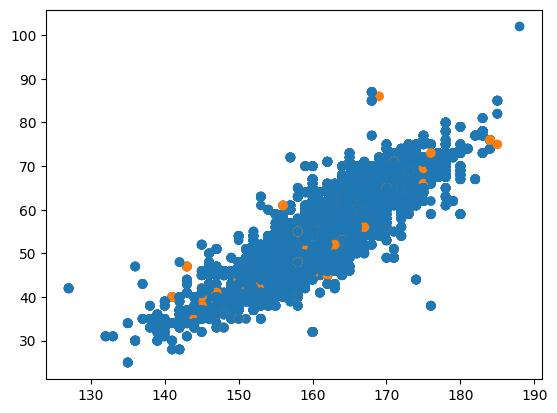

In [101]:
plt.scatter(X_log[:, 0], X_log[:, 1], c=np.array(['C0', 'C1'])[Y])
plt.show()